In [1]:
from astropy.table import Table

import numpy as np

from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from mass_ratio_plottingFunctions import median_hist, param_hist, param_hist_scatter, param_CDF

In [2]:
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/images/'

master_table = Table.read('../spirals/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt', 
                          format='ascii.commented_header')

#### Remove bad galaxies

In [3]:
bad_boolean = master_table['curve_used'] == -99

good_galaxies = master_table[np.logical_not(bad_boolean)]

#### Split galaxies into "walls" and "voids"

In [4]:
vboolean = good_galaxies['vflag'].data == 1
wboolean = good_galaxies['vflag'].data == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]

# Mass as a function of absolute magnitude

In [5]:
rabsmag_bins = np.array([-22, -21, -20, -19, -18])

## Median mass ratio

In [7]:
void_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['rabsmag'], frac=0.25)
wall_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


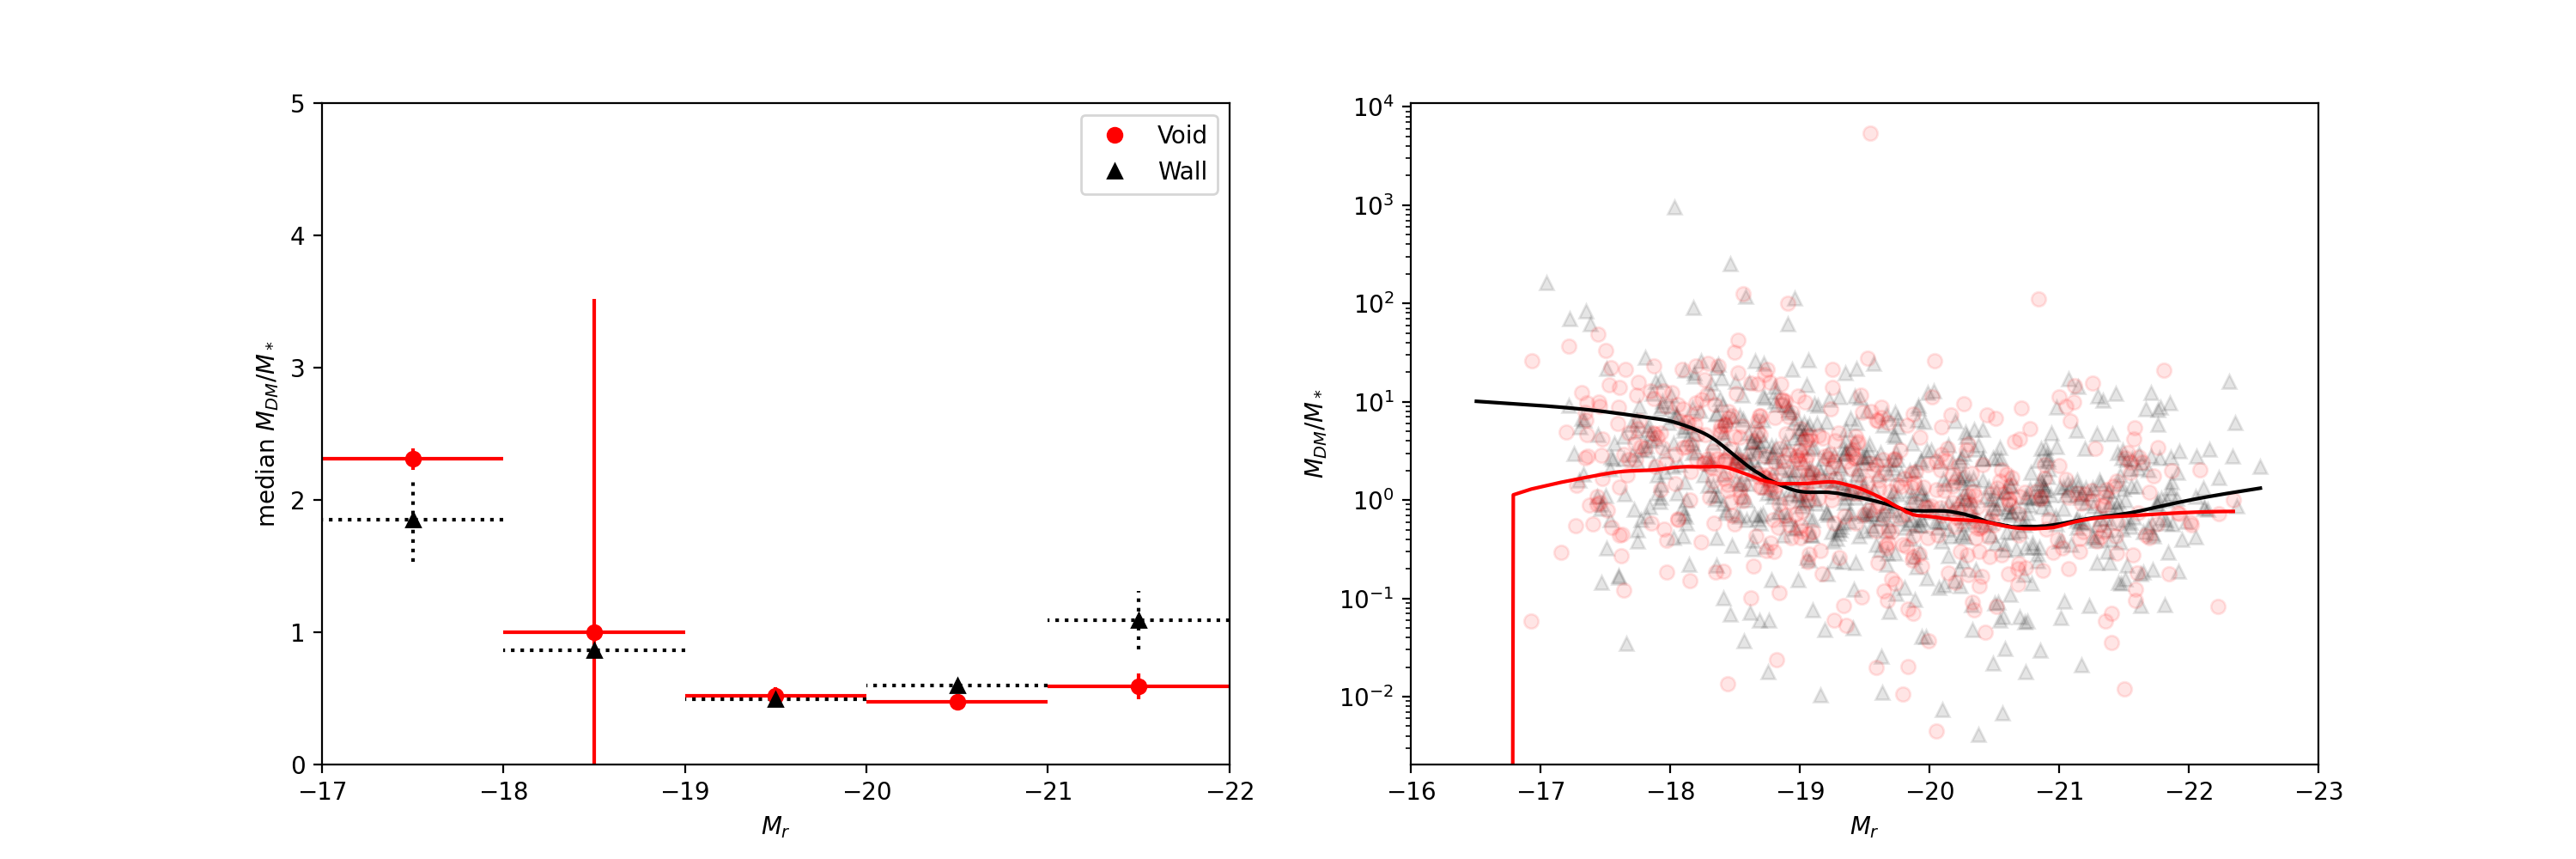

In [8]:
%matplotlib notebook

plt.figure(figsize=(15,5))


plt.subplot(121)

median_hist(void_table, wall_table, 'rabsmag', 'Mdark_Mstar_ratio', rabsmag_bins)

plt.xlim(-17,-22)
plt.ylim(0,5)


plt.subplot(122)

plt.semilogy(wall_table['rabsmag'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.1)

plt.semilogy(wall_smooth[:,0], wall_smooth[:,1], 'k')
plt.semilogy(void_smooth[:,0], void_smooth[:,1], 'r')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
plt.ylabel('$M_{DM}$/$M_*$');

## Median total mass, stellar mass

In [9]:
Mtot_void_smooth = lowess(void_table['Mtot'], void_table['rabsmag'], frac=0.25)
Mtot_wall_smooth = lowess(wall_table['Mtot'], wall_table['rabsmag'], frac=0.25)

Mstar_void_smooth = lowess(void_table['Mstar'], void_table['rabsmag'], frac=0.25)
Mstar_wall_smooth = lowess(wall_table['Mstar'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


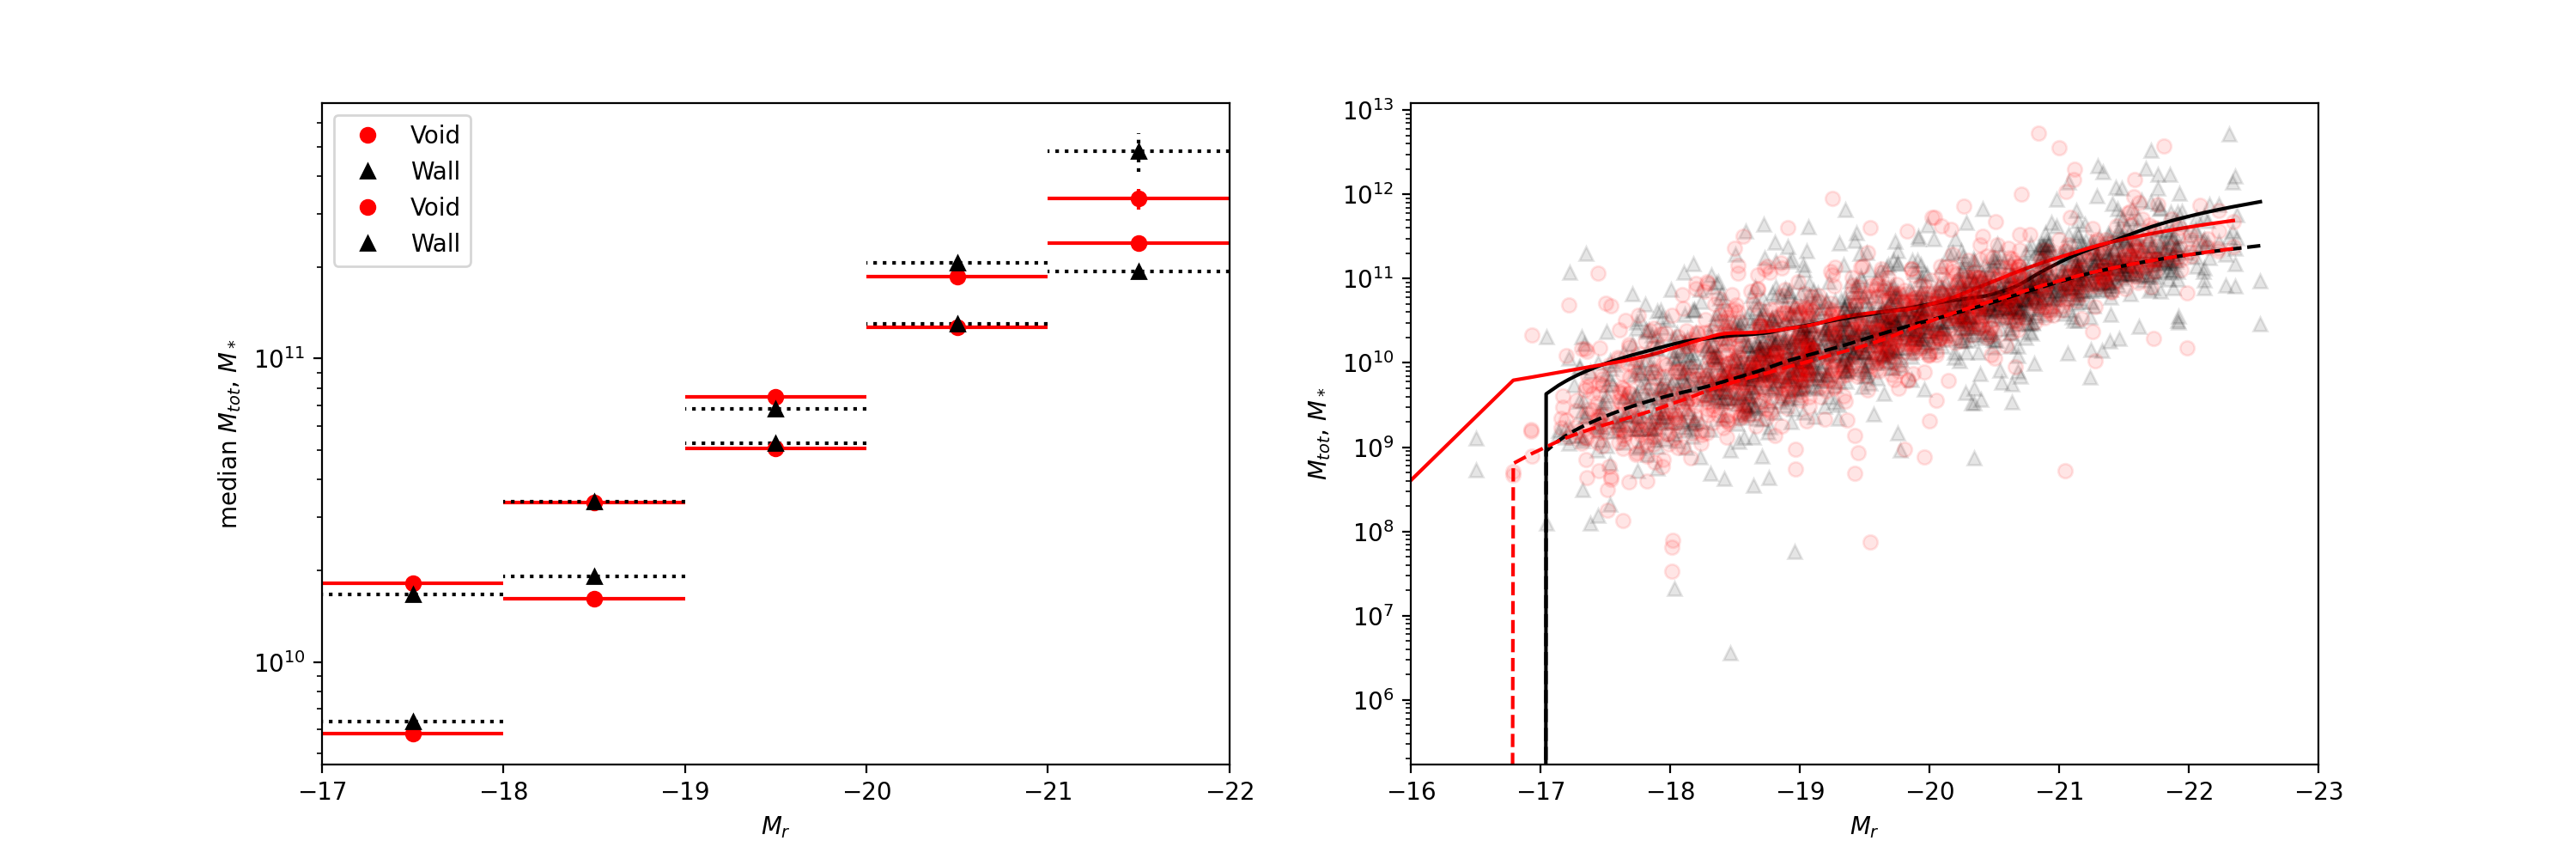

In [13]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'rabsmag', 'Mtot', rabsmag_bins)
median_hist(void_table, wall_table, 'rabsmag', 'Mstar', rabsmag_bins, 
            error_linestyle=['-.-', '--'])

plt.yscale('log')
plt.xlim(-17,-22)

plt.ylabel('median $M_{tot}$, $M_*$')
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

# Total mass
plt.semilogy(wall_table['rabsmag'], wall_table['Mtot'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mtot'], 'ro', alpha=0.1)

plt.semilogy(Mtot_wall_smooth[:,0], Mtot_wall_smooth[:,1], 'k')
plt.semilogy(Mtot_void_smooth[:,0], Mtot_void_smooth[:,1], 'r')

# Stellar mass
plt.semilogy(wall_table['rabsmag'], wall_table['Mstar'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['Mstar'], 'ro', alpha=0.1)

plt.semilogy(Mstar_wall_smooth[:,0], Mstar_wall_smooth[:,1], 'k--')
plt.semilogy(Mstar_void_smooth[:,0], Mstar_void_smooth[:,1], 'r--')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
plt.ylabel('$M_{tot}$, $M_*$');
#------------------------------------------------------------------------------

# Distribution of $M_r$

In [7]:
rabsmag_bins = np.array([-22, -21, -20, -19, -18, -17])

<IPython.core.display.Javascript object>


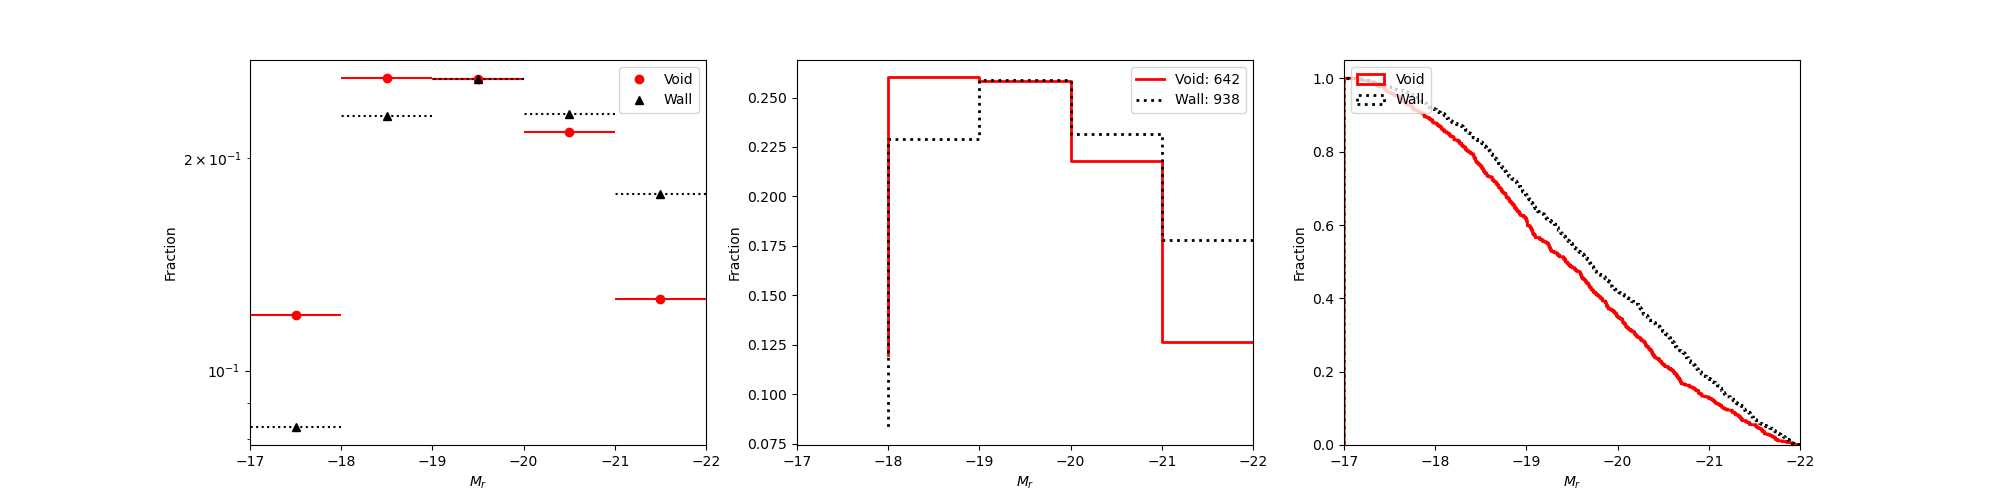

(-17.0, -22.0)

In [8]:
%matplotlib notebook

plt.figure(figsize=(20,5))


plt.subplot(131)
param_hist_scatter(void_table, wall_table, 'rabsmag', rabsmag_bins)
plt.xlim([-17,-22])


plt.subplot(132)
param_hist(void_table, wall_table, 'rabsmag', rabsmag_bins)
plt.xlim([-17,-22])


plt.subplot(133)
param_CDF(void_table, wall_table, 'rabsmag', (-22, -17))
plt.xlim([-17,-22]);

# Mass ratio v. maximum probed radius

In [9]:
v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['Rmax'], frac=0.25)
w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['Rmax'], frac=0.25)

<IPython.core.display.Javascript object>


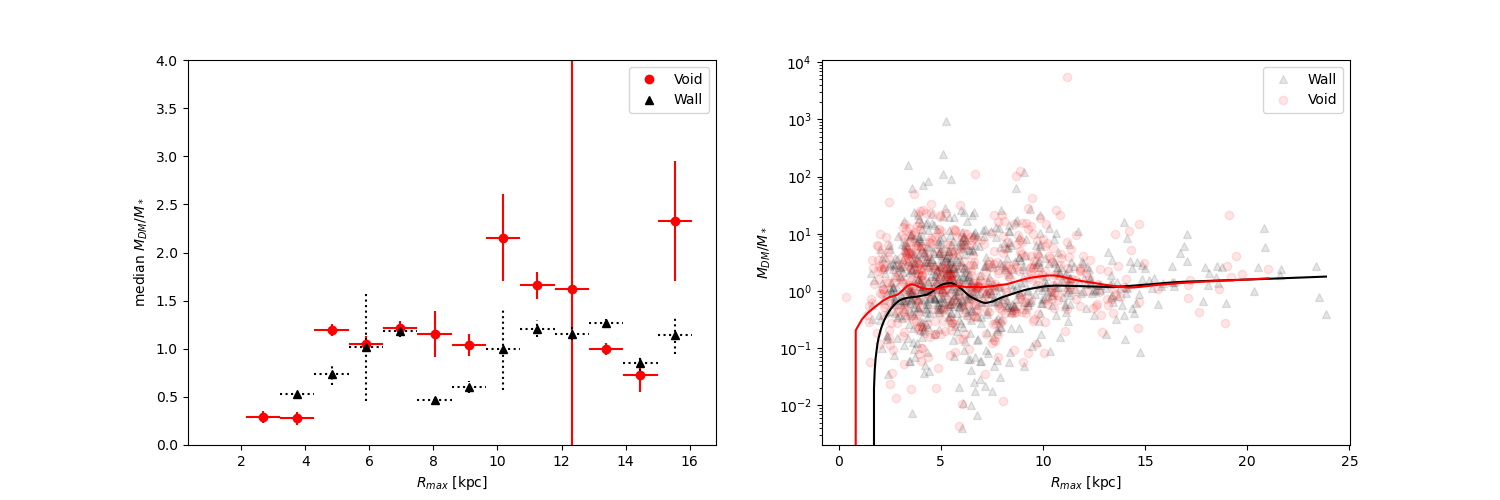

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'Rmax', 'Mdark_Mstar_ratio', 
            np.linspace(0,15,15))

plt.ylim([0,4])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['Rmax'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.1, 
             label='Wall')
plt.semilogy(void_table['Rmax'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.1, 
             label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{max}$ [kpc]')
plt.ylabel('$M_{DM}$/$M_*$')

plt.legend();
#------------------------------------------------------------------------------

In [5]:
v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['avg_r_turn'], frac=0.25)
w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['avg_r_turn'], frac=0.25)

<IPython.core.display.Javascript object>


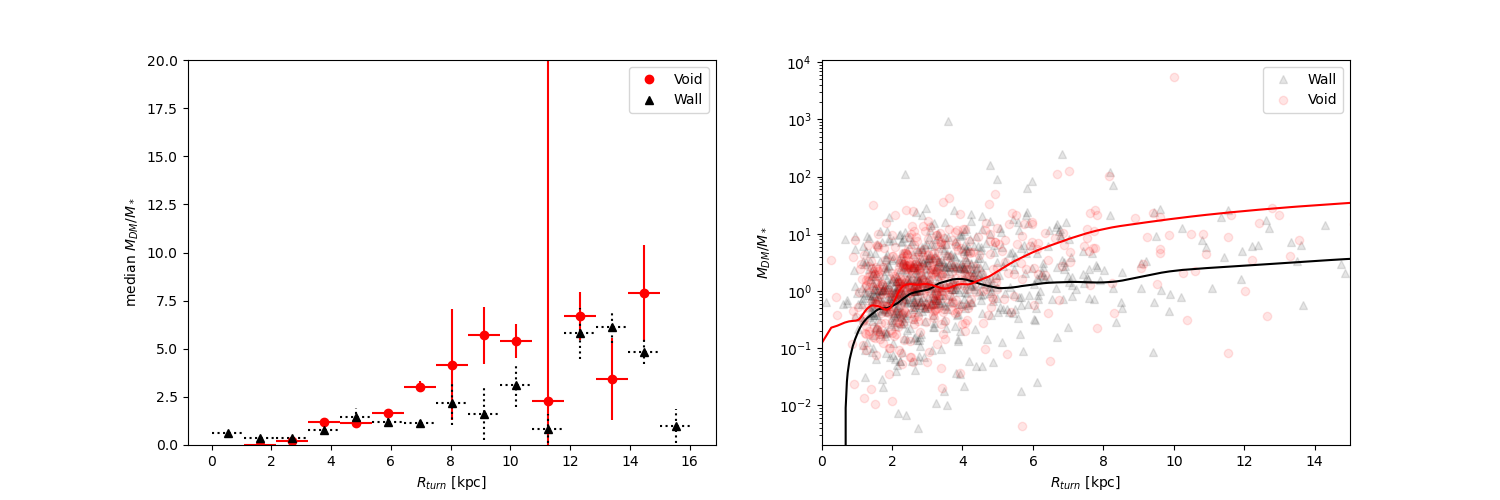

In [8]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'avg_r_turn', 'Mdark_Mstar_ratio', 
            np.linspace(0,15,15))

plt.ylim([0,20])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['avg_r_turn'], wall_table['Mdark_Mstar_ratio'], 'k^', 
             alpha=0.1, label='Wall')
plt.semilogy(void_table['avg_r_turn'], void_table['Mdark_Mstar_ratio'], 'ro', 
             alpha=0.1, label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{turn}$ [kpc]')
plt.ylabel('$M_{DM}$/$M_*$')

plt.xlim([0,15])

plt.legend();
#------------------------------------------------------------------------------